# Project 3 Part 1 - Real Estate Dataset
#### By: David Hoffman and Kyle Kolodziej

### 1. Import Data and Explore Data

In [5]:
# read in combined dataset into a dataframe
housing = pd.read_csv("data/WakeCountyHousing.csv") 

housing.head(5)

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [6]:
# check for null values
housing.isnull().sum()

Real_Estate_Id           0
Deeded_Acreage           0
Total_Sale_Price         0
Total_Sale_Date          0
Month_Year_of_Sale       0
Year_of_Sale             0
Year_Built               0
Year_Remodeled           0
Heated_Area              0
Num_Stories              0
Design_Style             0
Bath                    17
Utilities             1968
Physical_City          109
Physical_Zip           146
dtype: int64

Most of the data within this dataset is not missing; however, there is some data missing within the bath, utilities, physical city, and physical zip categories.  I do not think that any of these categories will be easy to impute, but we will decide how to deal with the missing data later.

In [7]:
max(housing['Total_Sale_Date'])

'9/9/2020'

In [8]:
min(housing['Total_Sale_Date'])

'1/1/1956'

The dataset contains homes that have been sold between January 1, 1956 and September 9, 2020.

In [9]:
housing['Num_Stories'].unique()

array(['One Story', 'Two Story', 'Other'], dtype=object)

In [10]:
housing['Num_Stories'].value_counts()

Other        186691
One Story     98744
Two Story     22857
Name: Num_Stories, dtype: int64

The houses within this dataset are either listed as 1-story, 2-story, or other with other being by far the most numerous category.  Behind other, 1-story homes are significantly more numerous than 2-story homes.  Additionally, I believe that this "other" category could be a good way to solve the missing data for bath, utilities, physical city, and physical zip by replacing all of the missing data with the cateogory of "other".

In [11]:
housing['Design_Style'].unique()

array(['Split level', 'Conventional', 'Ranch', 'Townhouse', 'Split Foyer',
       'Contemporary', 'Modular', 'Colonial', 'Conversion', 'Condo',
       'Log', 'Duplex', 'Manuf Multi', 'Cape'], dtype=object)

In [12]:
housing['Design_Style'].value_counts()

Conventional    231961
Townhouse        46636
Condo            11997
Ranch             7462
Split level       7111
Split Foyer       2157
Contemporary       636
Modular            201
Log                 79
Colonial            31
Cape                 8
Conversion           6
Duplex               4
Manuf Multi          3
Name: Design_Style, dtype: int64

There are 14 different categories of design style within this dataset with conventional being by far the most common and manuf multi being the least common.  Each of these different categories will not serve our model very well if they stay categorical, but this will be solved by one-hot encoding this feature.

In [13]:
housing['Bath'].unique()

array(['2 Bath', '1 Bath', 'Other', '3 Bath', '3½ Bath', '1 ½ Bath',
       '2½ Bath', nan], dtype=object)

In [14]:
housing['Bath'].value_counts()

2½ Bath     129385
2 Bath       57817
3½ Bath      54286
3 Bath       29079
Other        14398
1 Bath       12376
1 ½ Bath     10934
Name: Bath, dtype: int64

There are 7 different categories within the bath feature with the two and a half bath being the most common and the 1 and a half bath being the least common.  This feature also has a category named "other" similar to the num_stories feature so I will have to use a different designation for the missing data.

In [15]:
housing['Utilities'].unique()

array(['ALL', 'E', 'WSE', 'WGE', 'WE', nan, 'GE', 'S', 'WSG', 'W', 'SGE',
       'G', 'SE', 'SG', 'WG', 'WS'], dtype=object)

In [16]:
housing['Utilities'].value_counts()

ALL    229668
E       45702
WSE     14059
WE      13178
WGE      1599
GE       1434
SGE       280
SE        164
WS        130
W          46
S          26
WSG        19
WG         12
G           5
SG          2
Name: Utilities, dtype: int64

Within the utilities feature, there are 15 different categories with "all" being the most common.  Within this feature, E stands for electric, W stands for water, S stands for sewer, and G stands for gas.  All means that the house has all four utilities and any combination of E, W, S, or G means that those utilities are included within the home.

In [17]:
housing['Physical_City'].unique()

array(['Raleigh', 'Wendell', 'Cary', 'Knightdale', 'Fuquay Varina',
       'Garner', 'Apex', 'Wake Forest', 'Holly Springs', 'Zebulon',
       'Willow Spring', 'Rolesville', 'New Hill', 'Clayton', 'Durham',
       'Morrisville', 'Youngsville', 'Creedmoor', nan, 'Angier'],
      dtype=object)

In [18]:
housing['Physical_City'].value_counts()

Raleigh          144089
Cary              46172
Apex              26537
Wake Forest       20759
Fuquay Varina     14991
Holly Springs     13236
Garner             9593
Knightdale         8901
Morrisville        7208
Wendell            5578
Zebulon            4157
Rolesville         2621
Willow Spring      2387
New Hill           1005
Clayton             322
Angier              261
Youngsville         159
Durham              138
Creedmoor            69
Name: Physical_City, dtype: int64

There are 19 different cities within the dataset with Raleigh being the most common likely because it is the largest of the 19.  On the other hand, Creedmoor is the least common and also one of the smaller cities on the list.

### 2. Clean the Data

In [19]:
housing = housing.dropna()
housing.pop('Month_Year_of_Sale')
housing.pop('Total_Sale_Date')
housing.isnull().sum()

Real_Estate_Id      0
Deeded_Acreage      0
Total_Sale_Price    0
Year_of_Sale        0
Year_Built          0
Year_Remodeled      0
Heated_Area         0
Num_Stories         0
Design_Style        0
Bath                0
Utilities           0
Physical_City       0
Physical_Zip        0
dtype: int64

With the code above I removed all of the rows from the dataset that have missing values.  As stated in the previous section, the features that contained missing values would be impossible to impute and due to the large size of the dataset I decided that we could drop the rows with missing data entirely without effecting our prediction. Additionally, I decided to drop the Month_Year_of_Sale and Total_Sale_Dates variables entirely because I felt like this was redundant information as the year of sale was already listed as a feature and the non-numeric data messed with our model. Finally, as you can see from the output above, there is no longer any missing data within the dataframe after conducting this operation and we can move on.

### 3. Use a One-Hot Encoder

In [20]:
# one-hot encode categorical variables that do not have distinct heirarchy
df_ohe = pd.get_dummies(housing[['Design_Style','Utilities','Physical_City']])

housing_ohe = pd.concat([housing,df_ohe],axis=1)
housing_ohe.drop(['Design_Style','Utilities','Physical_City'],axis=1, inplace=True)

housing_ohe.head(5)

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Bath,Physical_Zip,...,Physical_City_Knightdale,Physical_City_Morrisville,Physical_City_New Hill,Physical_City_Raleigh,Physical_City_Rolesville,Physical_City_Wake Forest,Physical_City_Wendell,Physical_City_Willow Spring,Physical_City_Youngsville,Physical_City_Zebulon
0,19,0.21,34500,1974,1964,1964,1828,One Story,2 Bath,27610.0,...,0,0,0,1,0,0,0,0,0,0
1,20,0.46,35500,1983,1970,1970,1240,One Story,1 Bath,27610.0,...,0,0,0,1,0,0,0,0,0,0
2,22,0.46,37500,2004,1900,1900,2261,One Story,2 Bath,27591.0,...,0,0,0,0,0,0,1,0,0,0
3,25,0.96,70000,1971,1971,1971,3770,One Story,Other,27613.0,...,0,0,0,1,0,0,0,0,0,0
4,30,0.47,380000,2015,1946,2017,1789,One Story,2 Bath,27607.0,...,0,0,0,1,0,0,0,0,0,0


The code above serves to one-hot encode 3 of the major categorical variables within the dataset: design style, utilities, and physical city.  The first line of code creates a new, temporary dataframe with the one hot encoded columns.  Then, I combined the temporary dataframe with a new dataframe I titled housing_ohe and dropped the original categorical columns that I one-hot encoded.  As you can see, the one-hot encoding seperates each category within the original features into its own feature column and gives each row either a 1 or a 0 with the 1 indicating that the category listed in the title of the column is present in that row.

### 4. Use an Ordinal Encoder

In [21]:
# ordinally encode heirarchical categorical variables
# num_stories, baths

num_stories_mapper = {"One Story":1, "Two Story":2, "Other":3}
housing_ohe["Num_Stories"] = housing_ohe["Num_Stories"].replace(num_stories_mapper)

baths_mapper = {"1 Bath":1, "1 ½ Bath":2, "2 Bath":3, "2½ Bath":4, "3 Bath":5, "3½ Bath":6,"Other":7}
housing_ohe["Bath"] = housing_ohe["Bath"].replace(baths_mapper)

housing_ohe.head(5)

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Bath,Physical_Zip,...,Physical_City_Knightdale,Physical_City_Morrisville,Physical_City_New Hill,Physical_City_Raleigh,Physical_City_Rolesville,Physical_City_Wake Forest,Physical_City_Wendell,Physical_City_Willow Spring,Physical_City_Youngsville,Physical_City_Zebulon
0,19,0.21,34500,1974,1964,1964,1828,1,3,27610.0,...,0,0,0,1,0,0,0,0,0,0
1,20,0.46,35500,1983,1970,1970,1240,1,1,27610.0,...,0,0,0,1,0,0,0,0,0,0
2,22,0.46,37500,2004,1900,1900,2261,1,3,27591.0,...,0,0,0,0,0,0,1,0,0,0
3,25,0.96,70000,1971,1971,1971,3770,1,7,27613.0,...,0,0,0,1,0,0,0,0,0,0
4,30,0.47,380000,2015,1946,2017,1789,1,3,27607.0,...,0,0,0,1,0,0,0,0,0,0


With the code above, I ordinally encoded both the num_stories and the bath features to numerically represent these categorical variables.  I chose to ordinally encode these features rather than one-hot encode them because both of these features have a natural heirarchy with one-story being more than two-story and 1 bath being more than 2 baths so I thought it would be more effective to represent them as nominal variables rather than simple categorical variables.  The ordinal encoding should help our model achieve a better prediction.

### 5. Normalize Features using SKLearn

In [22]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scalar.fit(housing_ohe[['Year_of_Sale','Year_Remodeled','Year_Built']])
housing_ohe[['Year_of_Sale','Year_Remodeled','Year_Built']] = scalar.transform(housing_ohe[['Year_of_Sale','Year_Remodeled','Year_Built']])

housing_ohe.head(5)

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Bath,Physical_Zip,...,Physical_City_Knightdale,Physical_City_Morrisville,Physical_City_New Hill,Physical_City_Raleigh,Physical_City_Rolesville,Physical_City_Wake Forest,Physical_City_Wendell,Physical_City_Willow Spring,Physical_City_Youngsville,Physical_City_Zebulon
0,19,0.21,34500,-3.377447,-1.571319,-1.642016,1828,1,3,27610.0,...,0,0,0,1,0,0,0,0,0,0
1,20,0.46,35500,-2.522725,-1.266570,-1.331777,1240,1,1,27610.0,...,0,0,0,1,0,0,0,0,0,0
2,22,0.46,37500,-0.528371,-4.821977,-4.951227,2261,1,3,27591.0,...,0,0,0,0,0,0,1,0,0,0
3,25,0.96,70000,-3.662355,-1.215778,-1.280071,3770,1,7,27613.0,...,0,0,0,1,0,0,0,0,0,0
4,30,0.47,380000,0.516290,-2.485566,1.098425,1789,1,3,27607.0,...,0,0,0,1,0,0,0,0,0,0


In the above code segment, I normalized the data for the year of sale, year built, and year remodeled features.  I used the scikit learn normalization tool called the standard scaler which essentially standardizes the data in these three columns so that the new data has a mean of 0 and a standard deviation of 1.  The normalization of these features will help with our model's prediction especially when using linear regression or stochastic gradient decent which are dramatically improved through feature normalization. 

### 6. Use K-fold Cross-Validation

In [23]:
from sklearn.model_selection import KFold

X = housing_ohe.drop(columns=["Total_Sale_Price"])
X = X.values
y = housing_ohe["Total_Sale_Price"].values

kf = KFold(n_splits=2, random_state=None, shuffle=True)

for train_index, test_index in kf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

In the code above, I seperated the dataset into seperate training and testing sets using a k-fold validation shuffle split.  The k-fold split ensures that there is an equal class distribution between both the training and testing sets and for this example I implemented two seperate splits per set.  For this model, the X values (predictor variables) include all of the columns except total sale price while the y-values (predicted variables) include just the total sales price data. Now that I have divided the dataset into training and testing sets we are now ready to pass the data into a model and get some predictions

### 7. SKLearn Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.7018196396269447


Finally we are able to implement our first completed model.  I used the sklearn implementation of linear regression and after using it on our training data generated a regression score of about 70% when compared to the testing data.  This isn't horrible, but also isn't great either; hopefully another model will be able to have better performance on this dataset.  I will now implement a few different metrics to further judge the performance of the model.

### 8. Stochastic Gradient Descent Classifier

In [25]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

X_train, y_train = make_classification(n_samples=X_train.shape[0], n_features=X_train.shape[1], 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1)
SGD_classifier = SGDClassifier(loss="perceptron", learning_rate="optimal", 
                               n_iter_no_change=10)

print(cross_val_score(SGD_classifier, X_train, y_train, scoring="accuracy", cv=10).mean())

0.8983675074921644


In the above coding section, I implemented a stochastic gradient descent classifier on the training set of my dataset.  Stochastic gradient descent is used to minimize a cost function by iterating a gradient-based weight update which is applied to the dataset in batches.  The returned cross-validation score of .949 compares the results of the SGD classifier to both of the original x and y training datasets and evaluates the overall success/accuracy of the SGD classifier.

### 9. SKLearn Metrics: MSE and Explained Variance Score

In [26]:
from sklearn.metrics import mean_squared_error

# create new numpy array that is same size as y_test
y_predict = regr.predict(X_train)
y_predict = y_predict[:-1]

print(mean_squared_error(y_predict,y_test))

83862117808652.14


In [27]:
from sklearn.metrics import explained_variance_score

y_predict = regr.predict(X_train)
y_predict = y_predict[:-1]

print(explained_variance_score(y_predict,y_test))

-0.38340320251545834


Predicted values are very far off actual values which is why the mean squared error is so high and the explained variance is negative.  At the moment, I am not sure why we are getting this output; however, I will continue to investigate and see if there is any way to fix our linear regression model.  Additionally, I will implement a few other different models and will hopefully see better results there.

### 10. SKLearn Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train, y_train = make_classification(n_samples=X_train.shape[0], 
                                       n_features=X_train.shape[1],n_informative=2, 
                                       n_redundant=0,random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

2.6130128037627384e-05


The random forest classifier implemented above takes 2 different randomly selected subsets from the training set and creates a decision tree out of each of them.  The randomness of the subsets helps to enhance the overall accuracy of the classification as well as reduce overfitting which can be a big issue in many regression problems.  The .score helper function is used to  print the mean accuracy on the given testing datasets and can be a harsh metric since it requires for each sample that each label set be correctly predicted.

### 11. K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)
print(neigh.score(X_test, y_test))

Currently is taking way too long to run.  Will need to look into ways to optimize this

### 12. Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

# generate confusion matrix using random forest classifier
y_predict = clf.predict(X_train[:10])
# y_predict = y_predict[:-1]

print(confusion_matrix(y_test[:10], y_predict))

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]]


With the above code, I generated a confusion matrix comparing the first 10 values for the predictions under the random forest classifier model to the first 10 values within the y_test dataset.  To properly understand a confusion matrix, you need to udnerstand what the different numbers within the matrix mean.  In the output above, we can see that the matrix is filled with 1's and 0's.  The 1's indicate a true positive or instances where the prediction value matches the true value within the test dataset while the zeros show everywhere where the predicted value does not match the true value in the testing dataset.  As you can see, the majority of the matrix is filled with incorrect predictions; however, just having some correct predictions show that the random forrest classifier is performing more successfully than our linear regression model which consistently predicted values that were far from the correct values.

### 13. ROC Curve

C:\Users\dhoff\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


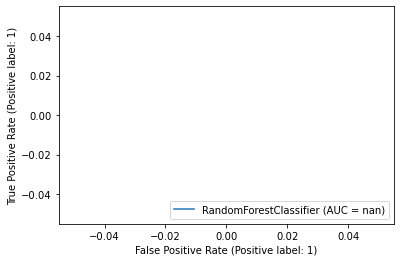

In [30]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_roc_curve(clf, X_test, y_test) 

plt.show()